In [1]:
from math import gamma
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 16
plt.rcParams["axes.axisbelow"] = True

### 事前分布 = Beta(8, 4) とする
- 歪んだコインで, "表がでる確率が2/3くらい" という事前情報

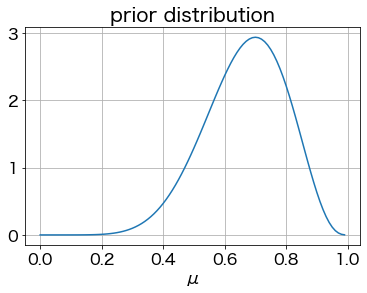

In [2]:
def beta(a, b, mu):
    return (gamma(a+b)/(gamma(a)*gamma(b)))*mu**(a-1)*(1-mu)**(b-1)

a = 8
b = 4
x = np.array([i/100 for i in range(100)])
prior = beta(a=a, b=b, mu=x)

plt.figure(figsize=(6, 4))
plt.plot(x, prior)
plt.title("prior distribution")
plt.xlabel("μ")
plt.grid()
plt.show()

In [3]:
# 追加でコイン投げた時(表:m, 裏:l)に事後分布はどうなるか
def show_posterior_dist(a, b, m, l):
    x = np.array([i/100 for i in range(100)])

    prior = beta(a=a, b=b, mu=x)
    posterior = beta(a=a+m, b=b+l, mu=x)

    mu_ml = m/(m+l)
    pos_mean = (m+a)/(m+a+l+b)
    pri_mean = a/(a+b)

    plt.figure(figsize=(6, 4))

    plt.plot(x, prior)
    plt.plot(x, posterior, c="tomato")

    plt.vlines(mu_ml, ymin=0, ymax=5, color="orange", linestyles="--", label=f"μの最尤推定量 = {round(mu_ml, 2)}")
    plt.vlines(pos_mean, ymin=0, ymax=5, color="tomato", linestyles="--", label=f"事後平均 = {round(pos_mean, 2)}")
    plt.vlines(pri_mean, ymin=0, ymax=5, linestyles="--", label=f"事前平均 = {round(pri_mean, 2)}")

    plt.title("posterior distribution")
    plt.xlabel("μ")
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.grid()
    plt.show()

### 表:10, 裏:2

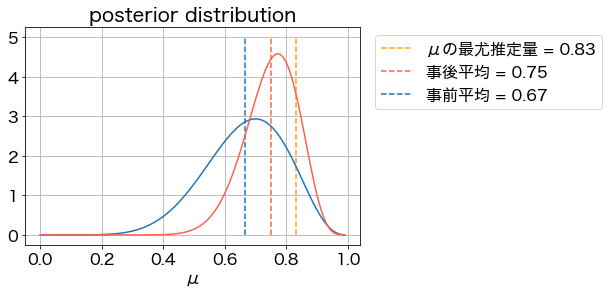

In [4]:
show_posterior_dist(a=a, b=b, m=10, l=2)

### 表6, 裏6

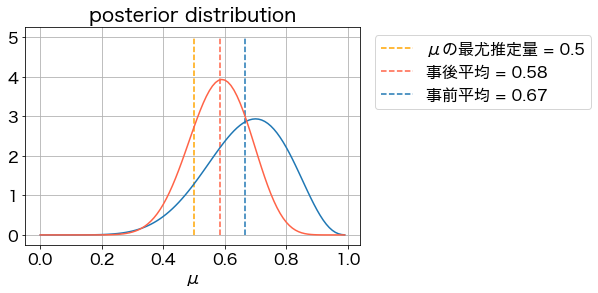

In [5]:
show_posterior_dist(a=a, b=b, m=6, l=6)

### 表8, 裏4

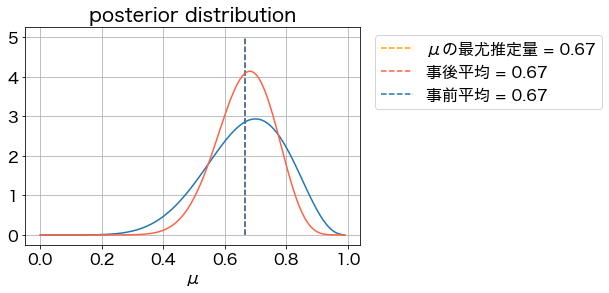

In [6]:
show_posterior_dist(a=a, b=b, m=8, l=4)

- 事後平均 が μの最尤推定量 と 事前平均 の間の値になっていることが確認できる